This is the Python code of the eigenfrequency example from the lecture on Plate Equations.

This code:
(C) Joris Remmers (2013-2019)


## Eigenfrequencies of a composite panel

Determine the eigenfrequencies of a composite panel

## Solution

Import the correct functions from the composite module and required mathematical operators:

In [1]:
from composite    import TransverseIsotropic,mixMaterials,Laminate
from numpy        import array,dot,zeros
from numpy.linalg import inv
from math         import sin,pi,sqrt
import numpy as np

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

As demonstrated in Example 3.6 and 3.7, the ply properties and laminate can be obtained as: 

In [2]:
carbon = TransverseIsotropic( 220e9,0.2,91.7e9)
epoxy  = TransverseIsotropic( 3.6e9,0.35,1.33e9)

compmat = mixMaterials( carbon , epoxy , 0.6 )

lam = Laminate()

lam.addMaterial( 'composite' , compmat )

lam.addLayer( 'composite' , 0  , 0.2e-3 )
lam.addLayer( 'composite' , 0  , 0.2e-3 )
lam.addLayer( 'composite' , 90 , 0.2e-3 )
lam.addLayer( 'composite' , 0  , 0.2e-3 )
lam.addLayer( 'composite' , 90 , 0.2e-3 )
lam.addLayer( 'composite' , 0  , 0.2e-3 )

print(lam)

  Laminate properties
  -----------------------------------------------------------
  layer   thick orient.  material
  -----------------------------------------------------------
      0   0.0002      0   composite
      1   0.0002      0   composite
      2   0.0002     90   composite
      3   0.0002      0   composite
      4   0.0002     90   composite
      5   0.0002      0   composite



In [3]:
a = 600.
b = 400.

To be able to calculate the midplain strains and curvature, the inverse laminate stiffness matrices $[A_1]$, $[B_1]$, $[C_1]$, and $[D_1]$ are required. First, the $[A]$, $[B]$ and $[D]$ matrixes are computed, and then the corresponding inverse matrice.

In [4]:
D = lam.getD()
rho = 2.7e-6
h = 1.2e-3

print("The matrix D :\n",D,"\n")

The matrix D :
 [[ 1.66300459e+01  3.30357442e-01 -2.75572326e-20]
 [ 3.30357442e-01  3.94181257e+00  1.63591814e-16]
 [-2.75572326e-20  1.63591814e-16  4.68605155e-01]] 



Now the midplain strains and curvature can be calculated: 

In [5]:
D1 = D[0,0]
D2 = D[1,1]
D3 = 2*D[0,1]

print("DDD ",D1,D2,D3)

DDD  16.63004591471787 3.9418125682023835 0.6607148848993346


Using these midplain strains and curvature, the stresses and strains in the individual layers can be calculated as:

In [6]:
n = 1
m= 1

freq= pi*pi/sqrt(rho*h)*sqrt(D1*(m/a)**4+2*D3*m*m*n*n/(a*a*b*b)+D2*(n/b)**4)
print(freq)

3.029323715689433


In [7]:
x  = np.arange(0.0, 1.01*a , 0.01*a )
y  = np.arange(0.0, 1.01*b , 0.01*b )

x, y = np.meshgrid(x, y)

q  = np.zeros((101,101))
wc = np.zeros((101,101))

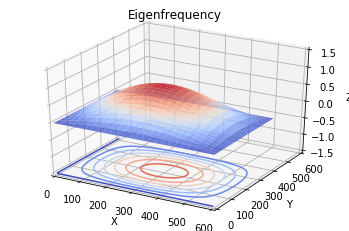

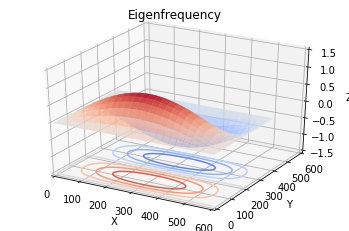

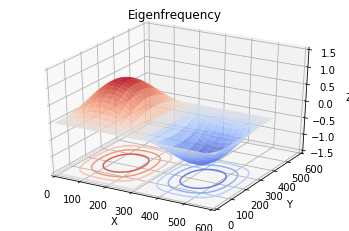

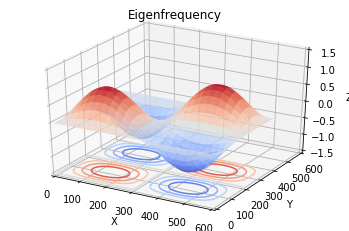

In [10]:
for m in range(1,3):
  for n in range(1,3):
     
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    
    for i in range(0,101):
      for j in range(0,101):
        wc[i,j] = sin(m*pi*x[i,j]/a)*sin(n*pi*y[i,j]/b)
    
   
    plt.title('Eigenfrequency')# '+str("%.2f" % ef)+' Hz; mode m='+str(m)+'; n='+str(n))
    ax.plot_surface(x, y, wc, rstride=4, cstride=4, alpha=0.8, cmap=cm.coolwarm)
    cset = ax.contour(x, y, wc, zdir='z', offset=-1.5, cmap=cm.coolwarm)
#cset = ax.contour(x, y, wc, zdir='x', offset=-40, cmap=cm.coolwarm)
#cset = ax.contour(x, y, wc, zdir='y', offset=40, cmap=cm.coolwarm)

    ax.set_xlabel('X')
    ax.set_xlim(0, a)
    ax.set_ylabel('Y')
    ax.set_ylim(0, a)
    ax.set_zlabel('Z')
    ax.set_zlim(-1.5,1.5)

    plt.savefig("freq"+str(m)+'x'+str(n)+".png")
    plt.show()